In [1]:
# Importing important libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import yfinance as yf
import seaborn as sns
sns.set()
plt.rcParams['figure.dpi'] = 100
plt.rcParams['figure.figsize'] = [6,4]

In [2]:
# Defining stock,start and end date
stock = 'ALKEM.NS'
start_date = "2021-01-01" 
end_date = "2021-12-31"
# Downloading the data of Praj Industries
df = yf.download(stock, start=start_date, end=end_date)

[*********************100%***********************]  1 of 1 completed


In [3]:
# Checking the data
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-01-01,2930.000000,2984.000000,2914.850098,2950.750000,2896.079834,41134
2021-01-04,2984.000000,2984.000000,2945.000000,2967.199951,2912.225342,68870
2021-01-05,2940.000000,3030.899902,2931.000000,2984.050049,2928.763184,111953
2021-01-06,2999.949951,3017.949951,2972.000000,2984.500000,2929.204590,110942
2021-01-07,2999.000000,3020.000000,2982.500000,3007.550049,2951.827637,110616


In [4]:
val = 0.75 # The margin we are expecting from a potential succesful trade

# Predicting high and low price based on previous day's close price
df['predhigh'] = df['Close'].shift(1)*(100+val)/100
df['predlow'] = df['Close'].shift(1)*(100-val)/100

In [5]:
# Creating a buy and sell counter to see if the predicted prices are met
df.loc[df.predhigh <= df.High, ['sell']] = 1
df.loc[df.predlow >= df.Low, ['buy']] = 1

In [6]:
# Assigning final sell and buy prices
 # Price at which we are selling the shares
df.loc[(df.predhigh <= df.High), ['final_sell']] = df.predhigh

# Price at which we are buying the shares
df.loc[df.predlow >= df.Low, ['final_buy']] = df.predlow 

In [7]:
# Squaring off the trades intraday iresspective of profits/loss
df.loc[((df.sell==1)&(df.buy==0)),'final_buy'] = df.Close
df.loc[((df.sell==0)&(df.buy==1)),'final_sell'] = df.Close

In [8]:
# Creating new feature for profits through buying and selling shares everyday

# Profit through buying shares at predicted low price
df['profit_buy'] = -100*(df.final_buy-df.Close)/df.final_buy  
 # Profit through selling shares at predicted high price
df['profit_sell'] = 100*(df.final_sell-df.Close)/df.final_sell 

In [9]:
# Filling the null values
df[['profit_sell','profit_buy']] = df[['profit_sell','profit_buy']].fillna(0)
# Final profit
df['profit'] = (df['profit_sell'])+(df['profit_buy'])

# Dropping columns of less importance
df.drop(['sell','Close','Adj Close','Volume','High','Low','buy'],axis=1,inplace=True)

In [10]:
# Calculating profits
profit_sell = np.sum(df.profit_sell)
profit_buy = np.sum(df.profit_buy)

profit = np.sum(df.profit)

print('Profit %:',profit)
print('Profit % through buying:',profit_buy)
print('Profit % through selling:',profit_sell)

Profit %: 90.7772265794356
Profit % through buying: 37.212688227074025
Profit % through selling: 53.56453835236159


In [11]:
def stockReturns(stock,start_date = "2009-11-01" ,end_date = "2021-11-18"):
    '''Returns a dataframe with all the information about the trades'''
    # Downloading the data of Praj Industries
    df = yf.download(stock, start=start_date, end=end_date)  
    val = 0.75 # The margin we are expecting from a potential succesful trade
    # Predicting high and low price based on previous day's close price
    df['predhigh'] = df['Close'].shift(1)*(100+val)/100
    df['predlow'] = df['Close'].shift(1)*(100-val)/100
    # Creating a buy and sell counter to see if the predicted prices are met
    df.loc[df.predhigh <= df.High, ['sell']] = 1
    df.loc[df.predlow >= df.Low, ['buy']] = 1
    # Assigning final sell and buy prices
    df.loc[(df.predhigh <= df.High), ['final_sell']] = df.predhigh  # Price at which we are selling the shares
    df.loc[df.predlow >= df.Low, ['final_buy']] = df.predlow  # Price at which we are buying the shares
    # Squaring off the trades intraday iresspective of profits/loss
    df.loc[((df.sell==1)&(df.buy==0)),'final_buy'] = df.Close
    df.loc[((df.sell==0)&(df.buy==1)),'final_sell'] = df.Close  
    # Creating new feature for profits through buying and selling shares everyday
    df['profit_buy'] = -100*(df.final_buy-df.Close)/df.final_buy  # Profit through buying shares at predicted low price
    df['profit_sell'] = 100*(df.final_sell-df.Close)/df.final_sell   # Profit through selling shares at predicted high price
    # Filling the null values
    df[['profit_sell','profit_buy']] = df[['profit_sell','profit_buy']].fillna(0)
    # Final profit
    df['profit'] = (df['profit_sell'])+(df['profit_buy'])
    # Dropping columns of less importance
    df.drop(['sell','Close','Adj Close','Volume','High','Low','buy'],axis=1,inplace=True)
    return df

[*********************100%***********************]  1 of 1 completed


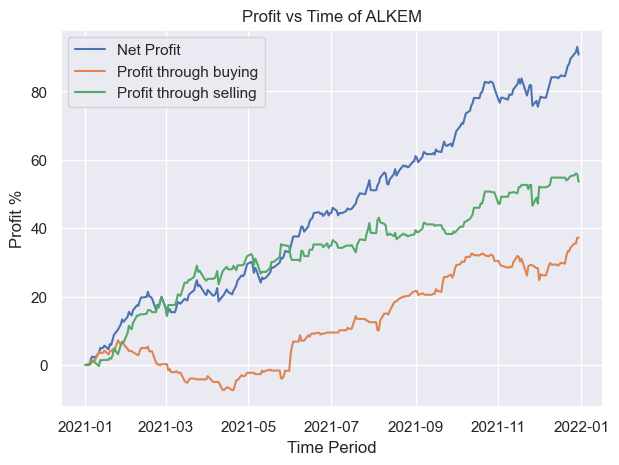

In [13]:
# Defining stock,start and end date
stock = 'ALKEM.NS'
start_date = "2021-01-01" 
end_date = "2021-12-31"

result = stockReturns(stock, start_date, end_date)
plt.figure(figsize=(7, 5)) 

# Plotting 
plt.plot(result.profit.cumsum()) # Plotting cumulative profits
plt.plot(result.profit_buy.cumsum()) # Plotting cumulative profits through buying
plt.plot(result.profit_sell.cumsum()) # Plotting cumulative profits through selling

title = 'Profit vs Time' + ' of '+ stock[:-3]
plt.xlabel('Time Period')
plt.ylabel('Profit %')
plt.title(title)
plt.legend(['Net Profit','Profit through buying','Profit through selling'])
plt.show()

[*********************100%***********************]  1 of 1 completed


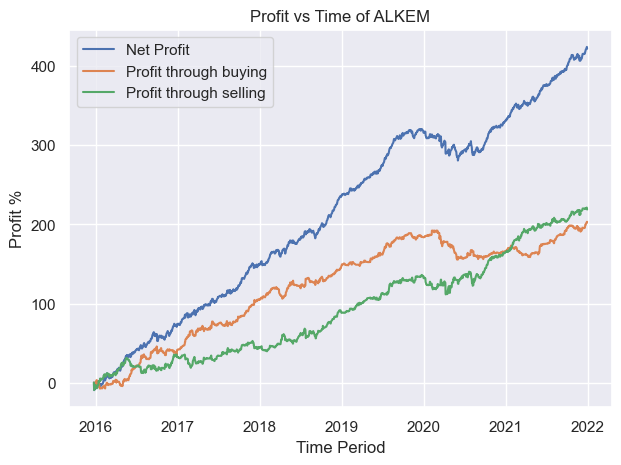

In [14]:
# Defining stock,start and end date
stock = 'ALKEM.NS'
start_date = "2015-01-01" 
end_date = "2021-12-31"

result = stockReturns(stock, start_date, end_date)
plt.figure(figsize=(7, 5)) 

# Plotting 
plt.plot(result.profit.cumsum()) # Plotting cumulative profits
plt.plot(result.profit_buy.cumsum()) # Plotting cumulative profits through buying
plt.plot(result.profit_sell.cumsum()) # Plotting cumulative profits through selling

title = 'Profit vs Time' + ' of '+ stock[:-3]
plt.xlabel('Time Period')
plt.ylabel('Profit %')
plt.title(title)
plt.legend(['Net Profit','Profit through buying','Profit through selling'])
plt.show()